# **Introduction**

This project analyzes a dataset from an advertiser to understand lead quality and identify opportunities for optimization. The dataset includes information about leads generated through online channels, such as lead demographics, campaign details, and lead interactions.

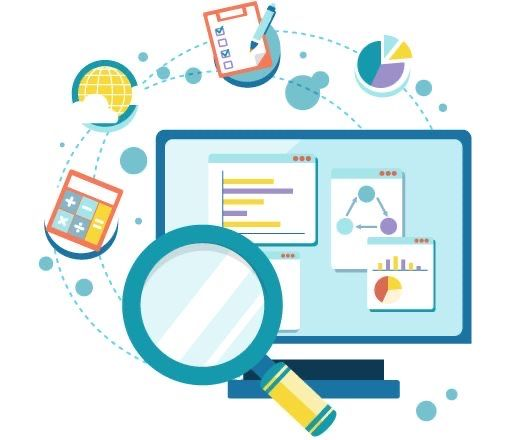

# **Project Goals**

Analyze lead quality trends over time.
Identify factors influencing lead quality.
Explore optimization strategies to increase lead quality and conversion rates.
Evaluate the potential for a 20% increase in lead quality, justifying a corresponding CPL increase.

# **Methodology**

Data Cleaning: Handling missing values, standardizing formats, and ensuring data integrity.

Exploratory Data Analysis (EDA): Visualizations and statistical summaries to uncover patterns and relationships in the data.

Feature Engineering: Extracting relevant features from existing data to enhance model performance.


Insights & Recommendations: Deriving actionable insights and recommendations based on the analysis.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Data Collection

In [ ]:
df = pd.read_csv("/content/sample_data/Analyst case study dataset 1.csv")

#Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LeadCreated                  3021 non-null   object 
 1   FirstName                    3021 non-null   object 
 2   Email                        3021 non-null   object 
 3   VendorLeadID                 3021 non-null   object 
 4   CallStatus                   881 non-null    object 
 5   WidgetName                   3021 non-null   object 
 6   PublisherZoneName            3021 non-null   object 
 7   PublisherCampaignName        3021 non-null   object 
 8   AddressScore                 1171 non-null   float64
 9   PhoneScore                   1393 non-null   float64
 10  AdvertiserCampaignName       3021 non-null   object 
 11  State                        3021 non-null   object 
 12  DebtLevel                    3021 non-null   object 
 13  IP Address        

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AddressScore,1171.0,4.286080,1.345192,1.0,4.0,5.0,5.0,5.0
PhoneScore,1393.0,3.903087,1.101826,1.0,3.0,4.0,5.0,5.0
IP Address,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking the shape of the data
df.shape

(8819, 24)

In [ ]:
#exploring the column names
df.columns

Index(['LeadCreated', 'FirstName', 'Email', 'VendorLeadID', 'CallStatus',
       'WidgetName', 'PublisherZoneName', 'PublisherCampaignName',
       'AddressScore', 'PhoneScore', 'AdvertiserCampaignName', 'State',
       'DebtLevel', 'IP Address', 'Partner', 'ReferralDomain',
       'MarketingCampaign', 'AdGroup', 'Keyword', 'SearchQuery', 'ReferralURL',
       'ReferralURL Parameters', 'LandingPageURL',
       'Landing Page URL Parameters'],
      dtype='object')

#Data Transformation

In [ ]:
#Checking if any duplicates are there or not
print(df.duplicated().sum())

#Eliminating the duplicate values
df.drop_duplicates(inplace=True)

#ReChecking if any duplicates left
print(df.duplicated().sum())

5798
0


In [ ]:
#Changing the format of the LeadCreated from object to datetime
df["LeadCreated"]=pd.to_datetime(df["LeadCreated"], format="%d-%m-%Y")

#Data Cleaning and handling missing values

In [ ]:
df.isnull().sum()

,0
LeadCreated,1
FirstName,1
Email,1
VendorLeadID,1
CallStatus,2140
WidgetName,1
PublisherZoneName,1
PublisherCampaignName,1
AddressScore,1850
PhoneScore,1628


In [ ]:
# Dropping columns with at least one null value
df.dropna(subset=["LeadCreated", "FirstName", "Email", "VendorLeadID", "WidgetName",
                          "PublisherZoneName", "PublisherCampaignName", "AdvertiserCampaignName",
                          "State", "DebtLevel", "Partner", "LandingPageURL", "Landing Page URL Parameters",
                          ], inplace=True)

In [ ]:
#Checking for rest of the null values
df.isnull().sum()


,0
LeadCreated,0
FirstName,0
Email,0
VendorLeadID,0
CallStatus,2139
WidgetName,0
PublisherZoneName,0
PublisherCampaignName,0
AddressScore,1849
PhoneScore,1627


Filling up the rest of the null values that have higher number of null values

In [ ]:
#Checking CallStatus
df["CallStatus"].value_counts()

,count
CallStatus,
Closed,245
Contacted - Doesn't Qualify,212
Unable to contact - Bad Contact Information,191
EP Confirmed,130
Contacted - Invalid Profile,85
EP Sent,16
EP Received,2


In [ ]:
#Fillin the missing values
df["CallStatus"].fillna("Unknown", inplace=True)

df["CallStatus"].value_counts()

,count
CallStatus,
Unknown,2139
Closed,245
Contacted - Doesn't Qualify,212
Unable to contact - Bad Contact Information,191
EP Confirmed,130
Contacted - Invalid Profile,85
EP Sent,16
EP Received,2


In [ ]:
#Handling Address score
df["AddressScore"].value_counts()

df["AddressScore"].fillna(0, inplace=True)  #0 = No address was mentioned

df["AddressScore"].value_counts()

,count
AddressScore,
0.0,1849
5.0,870
1.0,122
3.0,93
4.0,48
2.0,38


In [ ]:
#Handling Address score
df["PhoneScore"].value_counts()

df["PhoneScore"].fillna(0, inplace=True)  #0 = No information was mentioned

df["PhoneScore"].value_counts()

,count
PhoneScore,
0.0,1627
5.0,619
3.0,427
4.0,184
2.0,162
1.0,1


In [ ]:
# Handling IP Address
df["IP Address"].value_counts()  #it has null values hence it will be dropped

df.drop(columns=["IP Address"], inplace=True)

In [ ]:
#Handling ReferralDomain

df["ReferralDomain"].unique() #Since it has many unique values hence filling it with unknown value

df["ReferralDomain"].fillna("Unknown", inplace=True)

df["ReferralDomain"].isnull().sum()

0

In [ ]:
#Handling MarketingCampaign
df["MarketingCampaign"].value_counts()

df["MarketingCampaign"].fillna("Unknown", inplace=True)   # Nothing is mentioned hence taken as unknown

df["MarketingCampaign"].isnull().sum()

0

In [ ]:
#Handling AdGroup
df["AdGroup"].value_counts()

df["AdGroup"].fillna("Unknown", inplace=True)   # Nothing is mentioned hence taken as unknown

df["AdGroup"].isnull().sum()

0

In [ ]:
#Handling Keyword
df["Keyword"].value_counts()

df["Keyword"].fillna("Unknown", inplace=True)   # Nothing is mentioned hence taken as unknown

df["Keyword"].isnull().sum()

0

In [ ]:
#Handling Seach Query
most_frequent_query = df['SearchQuery'].mode()[0]   # using mode for filling up the value
df['SearchQuery'].fillna(most_frequent_query, inplace=True)


In [ ]:
#Handling referral url
most_frequent_url = df['ReferralURL'].mode()[0]      # using mode for filling up the value
df['ReferralURL'].fillna(most_frequent_url, inplace=True)


In [ ]:
#Handling referral url
most_frequent_url = df['ReferralURL'].mode()[0]       # using mode for filling up the value
df['ReferralURL'].fillna(most_frequent_url, inplace=True)

In [ ]:
#Handling referral url
most_frequent_url = df['ReferralURL Parameters'].mode()[0]      # using mode for filling up the value
df['ReferralURL Parameters'].fillna(most_frequent_url, inplace=True)

**Data Extraction**

In [ ]:
 #Extracting the components from WidgetName
df[['AdSize', 'Fieldset', 'Layout', 'Design']] = df['WidgetName'].str.extract(
    r'w-(\d+)-([\w\d]+)-([\dDC]+)-([\w\d-]+)'
)

# Handle cases without a design name
df['Design'] = df['Design'].fillna('None')

# Replace 300250 with 302252 (standardizing AdSize)
df['AdSize'] = df['AdSize'].replace({'300250': '302252'})

# Display the resulting DataFrame
print(df)


     LeadCreated  FirstName                          Email  \
0     2009-07-01    Dorinda       kanani@sandwichisles.net   
1     2009-04-13   Presetta          clerk2@ustconline.net   
2     2009-04-21       Gina         wagoner_gina@yahoo.com   
3     2009-08-03       Kari              usa4ley@yahoo.com   
4     2009-04-13  Stephanie      sr1lambert@embarqmail.com   
...          ...        ...                            ...   
3016  2009-06-30        amy                ahokett@sjc.edu   
3017  2009-04-25     brandy          brandy75137@yahoo.com   
3018  2009-04-12   jennifer  jennifer_woods48375@yahoo.com   
3019  2009-09-23      debra             debraroque@att.net   
3020  2009-04-27     Ricard        silva3131@sbcglobal.net   

                              VendorLeadID  \
0     FDF81FDA-A649-437B-B99C-FDDE74F7971B   
1     4190ACB7-5026-416C-B987-ED8AD427D5E6   
2                   hFg80jf_R0CRN55hdhWILw   
3                   jB01QgYZxkWArI9jWxuufw   
4     D5B32074-458E-40EC-

In [ ]:
#Dropping the widgetname
df.drop(columns=["WidgetName"],inplace=True)

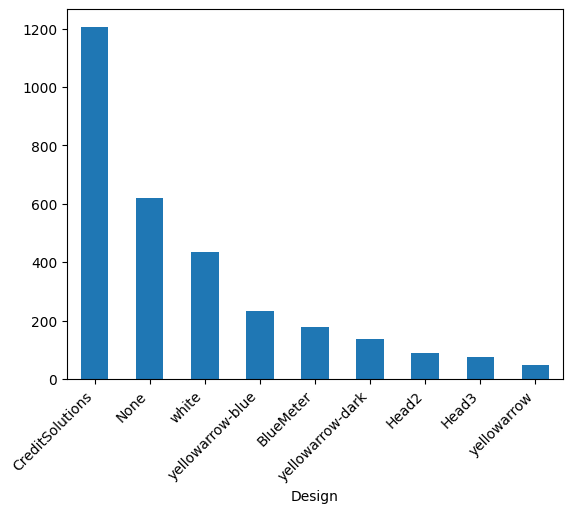

In [ ]:
#Exploring the design column
df["Design"].value_counts().plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.show( )

PublisherZoneName
topleft-302252      2749
top right-302252     271
Name: count, dtype: int64 



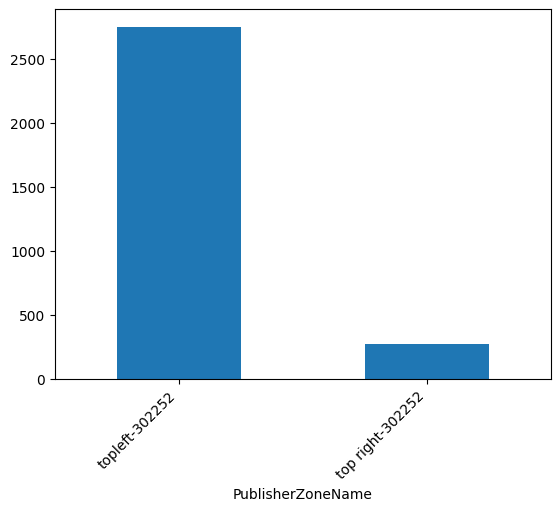

In [ ]:
#Checking the unqiue values for the publisher Zone
df["PublisherZoneName"].value_counts()

# Standardizing PublisherZoneName
df['PublisherZoneName'] = df['PublisherZoneName'].str.lower().replace({
    'top right-300x250': 'top right-302252'
})

# Summarizing counts for each zone
zone_counts = df['PublisherZoneName'].value_counts()
print(zone_counts,"\n")

#Doint Exploration
zone_counts.plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.show()

PublisherZoneName
top right-302252    0.095941
topleft-302252      0.079665
Name: Conversion, dtype: float64 



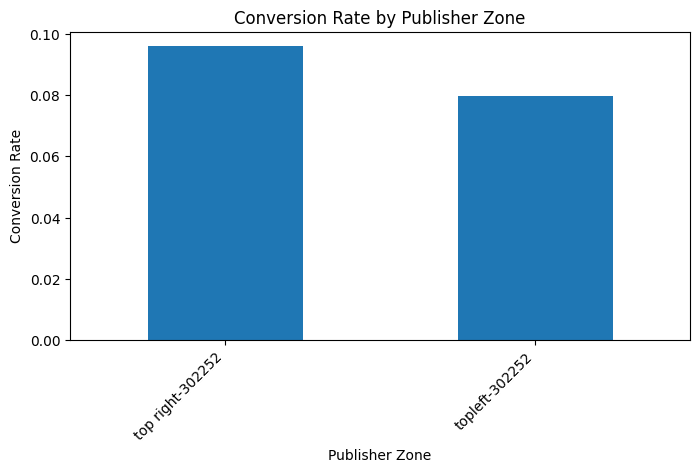

In [ ]:
# Conversion Rate Analysis for the closed callstatus
conversion_df = df.copy()
conversion_df['Conversion'] = conversion_df['CallStatus'].apply(lambda x: 1 if x == 'Closed' else 0)

# Grouping by Publisher Zone
conversion_rate = conversion_df.groupby('PublisherZoneName')['Conversion'].mean()
print(conversion_rate, "\n")

# Visualizing Conversion Rates
conversion_rate.plot(kind='bar', figsize=(8, 4))
plt.title('Conversion Rate by Publisher Zone')
plt.xlabel('Publisher Zone')
plt.ylabel('Conversion Rate')
plt.xticks(rotation = 45,ha="right")
plt.show()


# **Hypothesis Testing**

Significance value/ p-value = 0.05

H0=There is a statistically significant association between PublisherZoneName and CallStatus

H1=There is No statistical significance association between PublisherZoneName and CallStatus

In [ ]:
#Checking any statistical significance between publisherZoneName and call status
from scipy.stats import chi2_contingency

# Chi-square test for CallStatus distribution by PublisherZoneName
contingency_table = pd.crosstab(df['PublisherZoneName'], df['CallStatus'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square test:")
print(f"Chi2 value: {chi2:.4f}, p-value: {p:e}")


Chi-square test:
Chi2 value: 44.2398, p-value: 1.920344e-07


Conclusion

Reject the Null Hypothesis: Since the p-value is much smaller(0.00) than 0.05, we can reject the null hypothesis. This means that there is no statistically significant association between PublisherZoneName and CallStatus.

Significance: The result indicates that the distribution of CallStatus varies significantly across different PublisherZoneName. Therefore, different publisher zones do not impact the call status of leads that much.



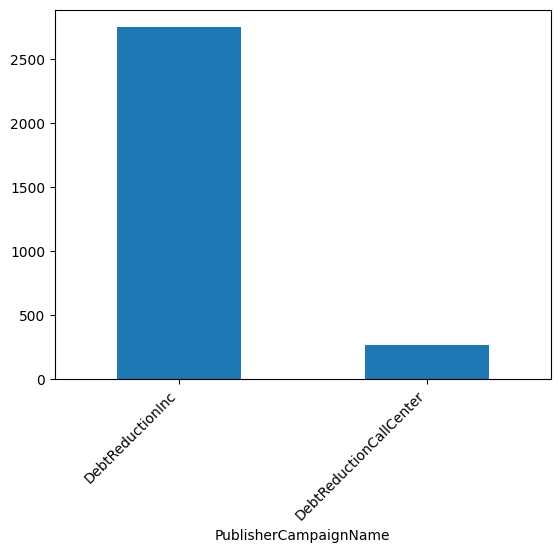

In [ ]:
#Exploring Publisher CampaignName
df["PublisherCampaignName"].value_counts().plot(kind="bar")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Grouping by AddressScore and analyze CallStatus
score_quality = df.groupby('AddressScore')['CallStatus'].value_counts(normalize=True)
print(score_quality)



AddressScore  CallStatus                                 
0.0           Unknown                                        0.714981
              Closed                                         0.089778
              Unable to contact - Bad Contact Information    0.073012
              Contacted - Doesn't Qualify                    0.049757
              EP Confirmed                                   0.034613
              Contacted - Invalid Profile                    0.031909
              EP Sent                                        0.004867
              EP Received                                    0.001082
1.0           Unknown                                        0.680328
              Unable to contact - Bad Contact Information    0.090164
              Contacted - Doesn't Qualify                    0.081967
              EP Confirmed                                   0.065574
              Closed                                         0.040984
              Contacted - Invali

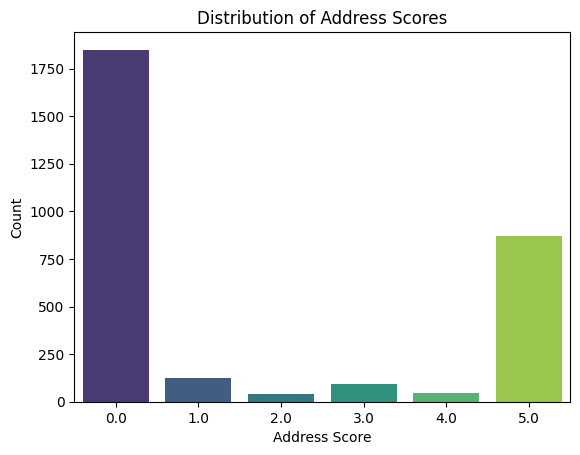

In [ ]:
# Plot AddressScore distribution
sns.countplot(data=df, x='AddressScore', palette='viridis')
plt.title('Distribution of Address Scores')
plt.xlabel('Address Score')
plt.ylabel('Count')
plt.show()

**1. Unknown CallStatus Dominates Across All Scores**
Unknown has the highest proportion across all AddressScore categories, ranging from:

      71% for AddressScore 0.0

      68% for AddressScore 1.0

      63% for AddressScore 2.0

      Peaks at 73% for AddressScore 4.0.



**Insight: **

A large portion of leads remains "Unknown," regardless of AddressScore. This could indicate incomplete customer journeys or leads dropping out before conversion.

2. Higher AddressScores Correlate with Better Outcomes
Closed (High-Quality Leads):

      AddressScore 0.0: 8.9%

      AddressScore 1.0: 4.1%

      AddressScore 2.0: 10.5%

      AddressScore 5.0: 7.4%

      Peak closed rate (10.5%) occurs at AddressScore 2.0.


**EP Confirmed (Leads in Progress):**
Gradual increase in EP Confirmed proportion as AddressScore rises (e.g., 3.4% for 0.0 to 5.7% for 5.0).


**Insight**: While higher AddressScores generally correlate with better lead outcomes (e.g., higher "Closed" and "EP Confirmed"), AddressScore 2.0 seems anomalously strong, suggesting further investigation is needed.

**Recommendations:**

Focus on Leads with High AddressScores (4.0–5.0):


These have the highest "Closed" and "EP Confirmed" rates.
thus need to ensure marketing resources target high-quality AddressScore groups.
Investigate the "Unknown" Status:

A high percentage of leads remain in the Unknown status across all AddressScores.
Review why these leads aren't progressing and consider follow-up campaigns.
Address Mid-Score Gaps:

Leads with AddressScores of 3.0–4.0 show higher proportions of "Contacted - Doesn’t Qualify."
Refine targeting criteria for mid-score leads to improve qualification rates.
Improve Validation for Low Scores (0.0–1.0):

Leads with AddressScores of 0.0–1.0 show poor outcomes overall.
Consider stricter validation mechanisms or deprioritize low-score leads to improve efficiency.

AdvertiserCampaignName
Debt Settlement1 Master              1814
creditsolutions-branded-shortform    1206
Name: count, dtype: int64


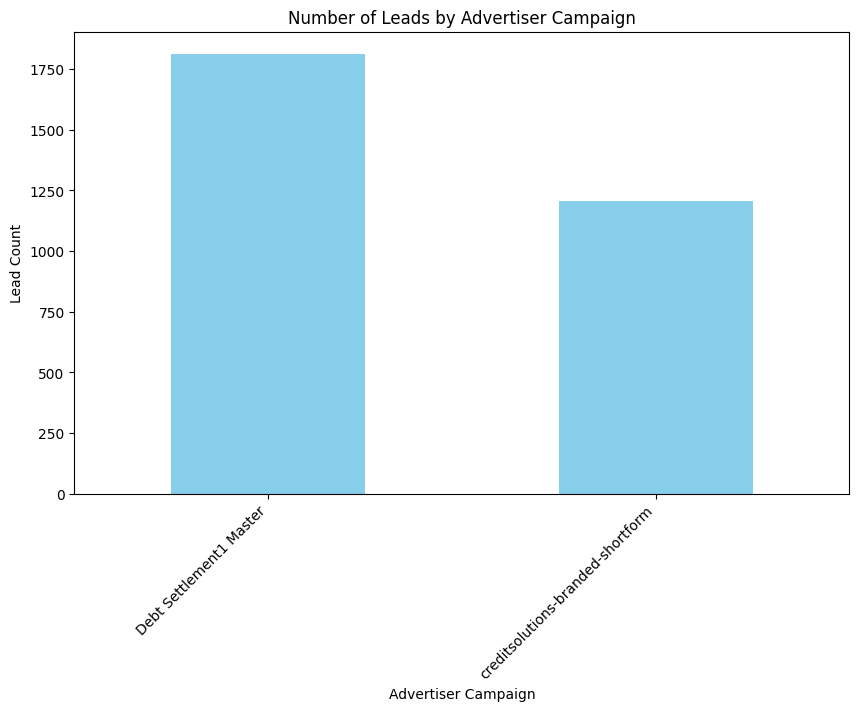

In [ ]:
# Count the number of leads by AdvertiserCampaignName
campaign_counts = df['AdvertiserCampaignName'].value_counts()
print(campaign_counts)

# Plotting the campaign distribution
campaign_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Leads by Advertiser Campaign')
plt.xlabel('Advertiser Campaign')
plt.ylabel('Lead Count')
plt.xticks(rotation=45, ha='right')
plt.show()



AdvertiserCampaignName
Debt Settlement1 Master              0.083241
creditsolutions-branded-shortform    0.077944
Name: CallStatus, dtype: float64 



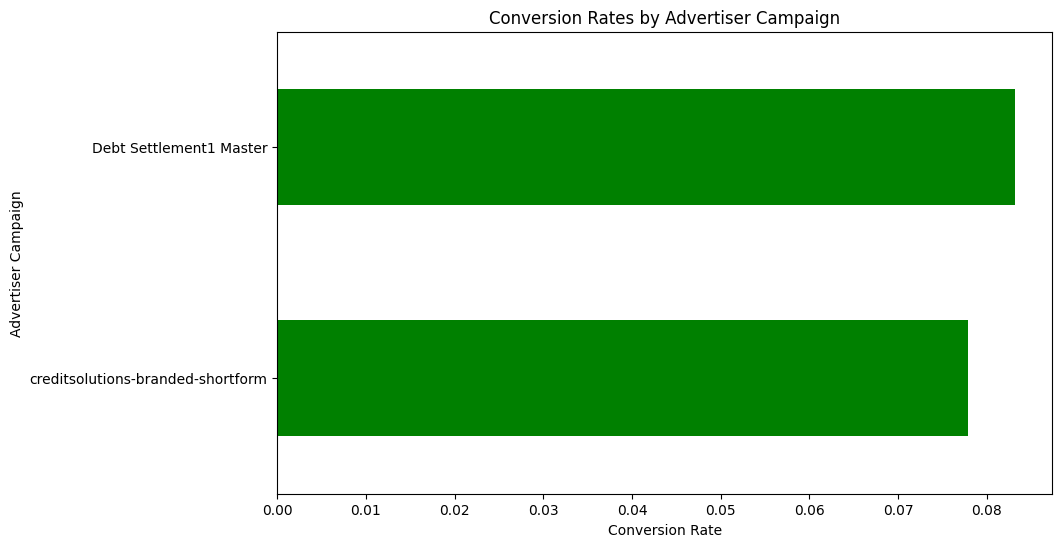

In [ ]:
# Calculate conversion rates by campaign
conversion_rates = df.groupby('AdvertiserCampaignName')['CallStatus'].apply(
    lambda x: (x == 'Closed').mean()
)
print(conversion_rates,"\n")

# Bar plot for conversion rates
conversion_rates.sort_values().plot(kind='barh', color='green', figsize=(10, 6))
plt.title('Conversion Rates by Advertiser Campaign')
plt.xlabel('Conversion Rate')
plt.ylabel('Advertiser Campaign')
plt.show()


In [ ]:
df["State"].nunique()

32

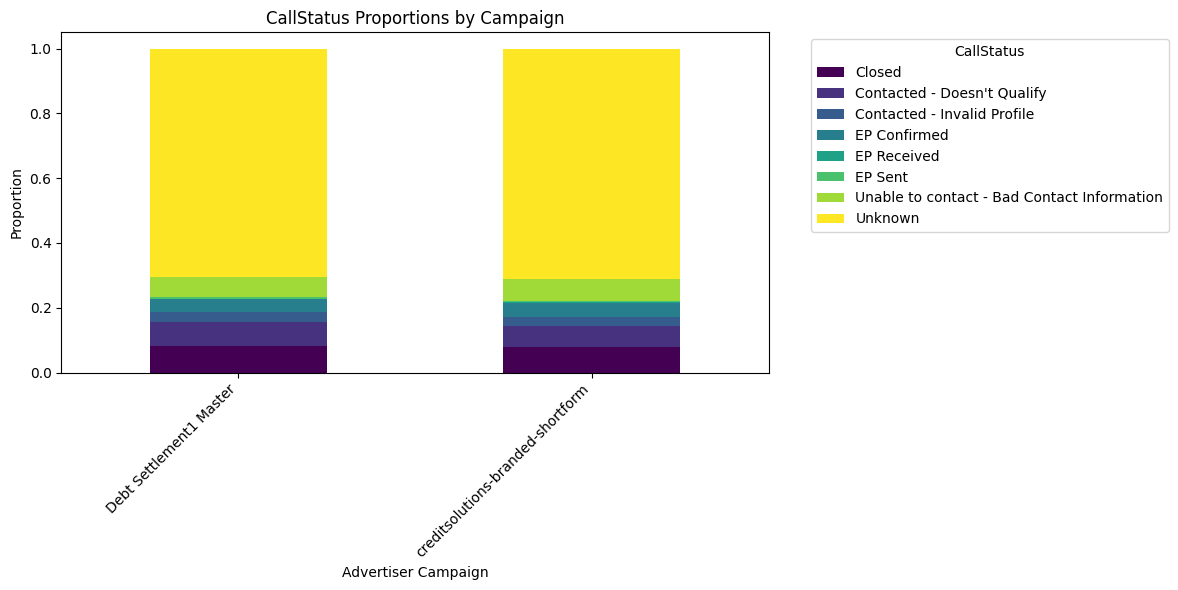

In [ ]:
# Group by Campaign and CallStatus and calculate proportions
campaign_callstatus = df.groupby(['AdvertiserCampaignName', 'CallStatus']).size().unstack()
campaign_callstatus = campaign_callstatus.div(campaign_callstatus.sum(axis=1), axis=0)

# Plot stacked bar chart
campaign_callstatus.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('CallStatus Proportions by Campaign')
plt.xlabel('Advertiser Campaign')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='CallStatus', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#Replacing the word
df["Partner"]=df["Partner"].replace("google","Google")

Partner
Google           1618
yahoo             957
Call_Center       271
AdKnowledge       171
Advertise.com       3
Name: count, dtype: int64


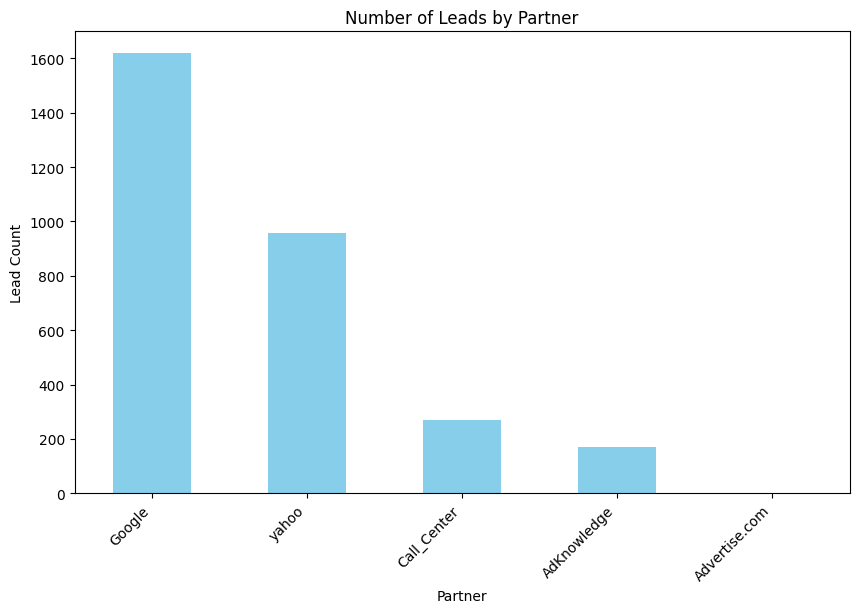

In [ ]:
# Count the number of leads by partner
partner_counts = df['Partner'].value_counts()
print(partner_counts)

# Visualize partner distribution
partner_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Leads by Partner')
plt.xlabel('Partner')
plt.ylabel('Lead Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Partner
AdKnowledge      0.122807
Advertise.com    0.333333
Call_Center      0.095941
Google           0.076020
yahoo            0.077325
Name: CallStatus, dtype: float64


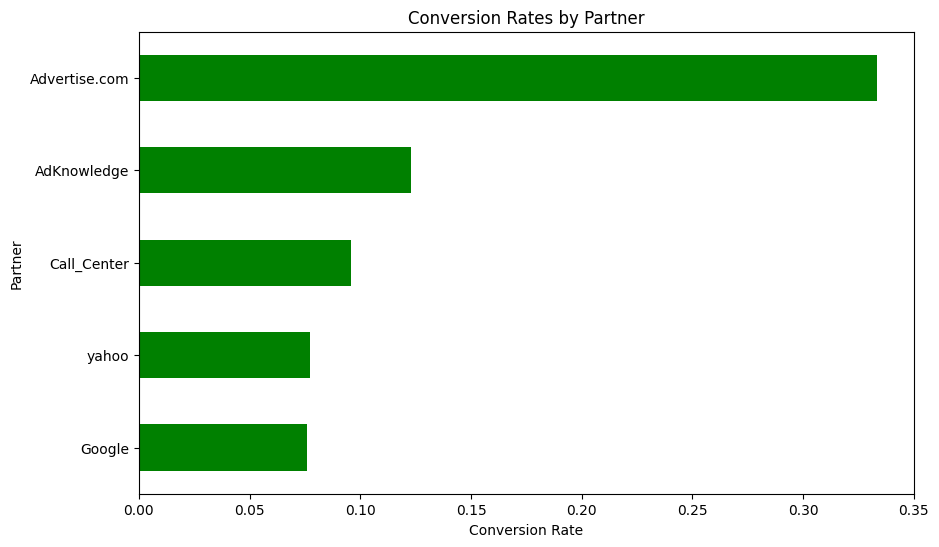

In [ ]:
# Calculate conversion rates by partner
conversion_rates = df.groupby('Partner')['CallStatus'].apply(lambda x: (x == 'Closed').mean())
print(conversion_rates)

# Visualize conversion rates
conversion_rates.sort_values().plot(kind='barh', color='green', figsize=(10, 6))
plt.title('Conversion Rates by Partner')
plt.xlabel('Conversion Rate')
plt.ylabel('Partner')
plt.show()


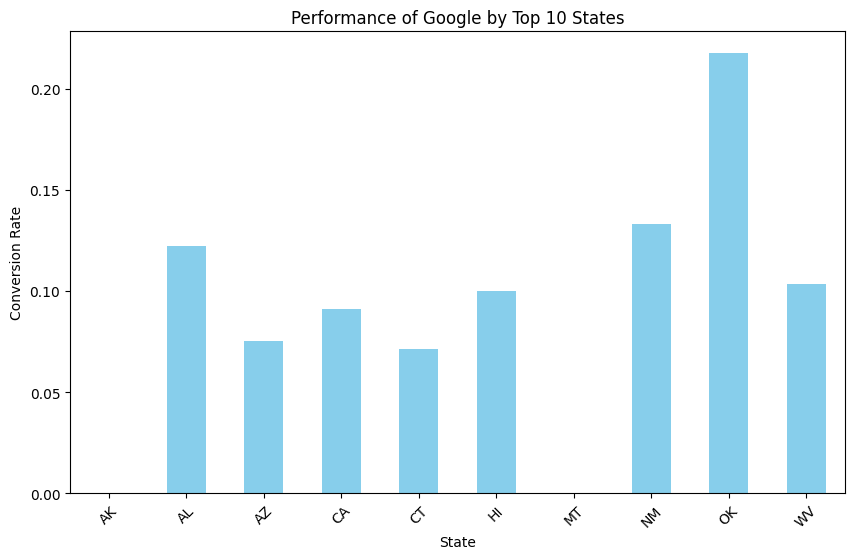

In [ ]:
# Example: Bar chart for a specific partner
partner = "Google"  # Replace with the desired partner name
partner_data = partner_state_performance.loc[partner]

# Plot bar chart for a single partner's performance
partner_data.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title(f'Performance of {partner} by Top 10 States')
plt.xlabel('State')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()


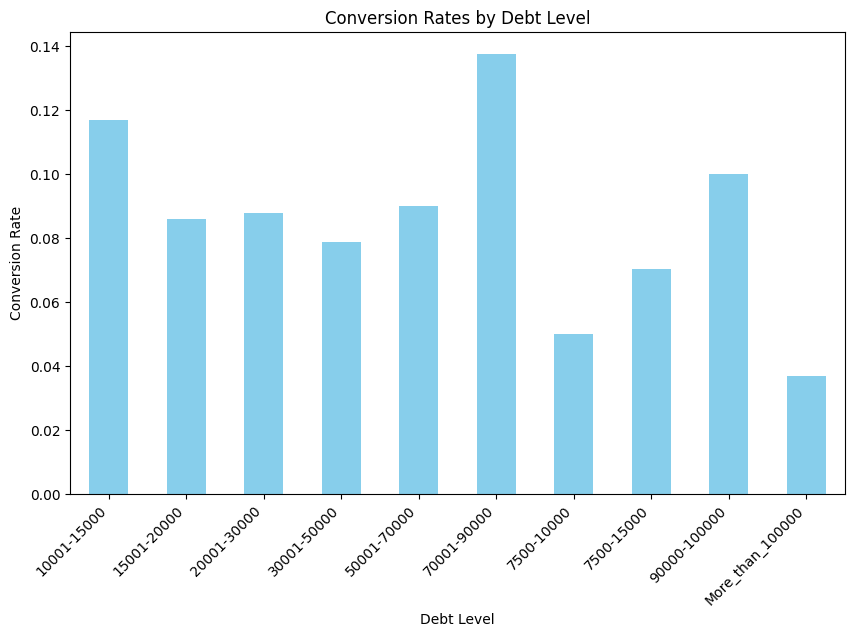

In [ ]:
# Debt Level Analysis
debt_level_conversion = df.groupby('DebtLevel')['CallStatus'].apply(lambda x: (x == 'Closed').mean())
debt_level_conversion.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Conversion Rates by Debt Level')
plt.xlabel('Debt Level')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

Time-Based Analysis

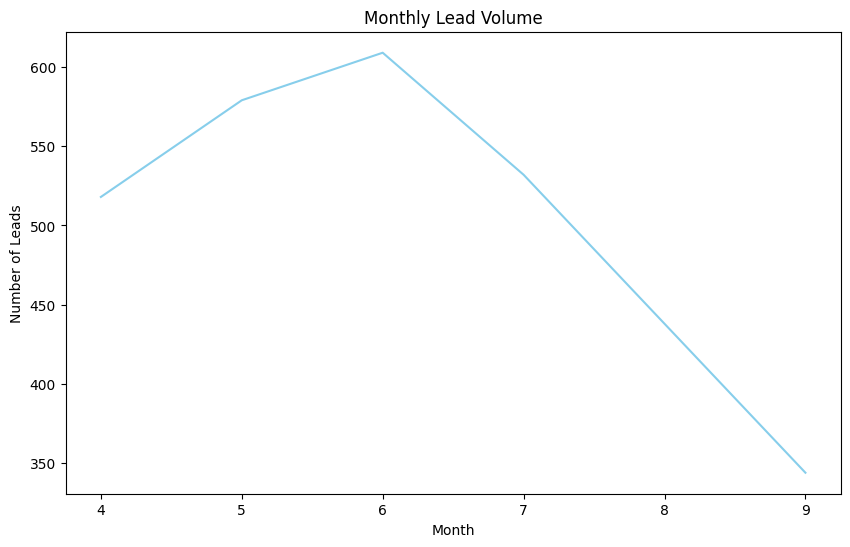

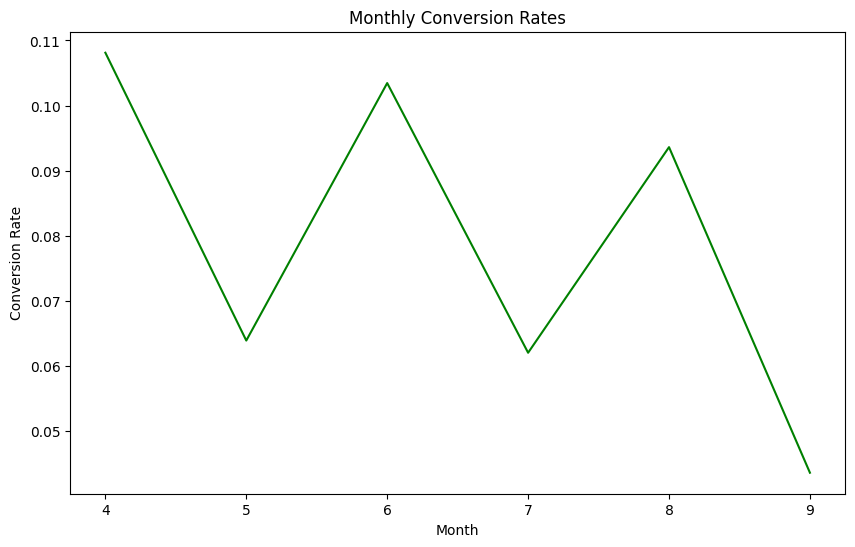

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and cleaned

# Extract month from LeadCreated date
df['LeadCreated_Month'] = df['LeadCreated'].dt.month

# Calculate monthly lead volume
monthly_lead_volume = df.groupby('LeadCreated_Month')['CallStatus'].count()

# Plot monthly lead volume
monthly_lead_volume.plot(kind='line', color='skyblue', figsize=(10, 6))
plt.title('Monthly Lead Volume')
plt.xlabel('Month')
plt.ylabel('Number of Leads')
plt.show()

# Calculate monthly conversion rates
monthly_conversion_rates = df.groupby('LeadCreated_Month')['CallStatus'].apply(lambda x: (x == 'Closed').mean())

# Plot monthly conversion rates
monthly_conversion_rates.plot(kind='line', color='green', figsize=(10, 6))
plt.title('Monthly Conversion Rates')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.show()


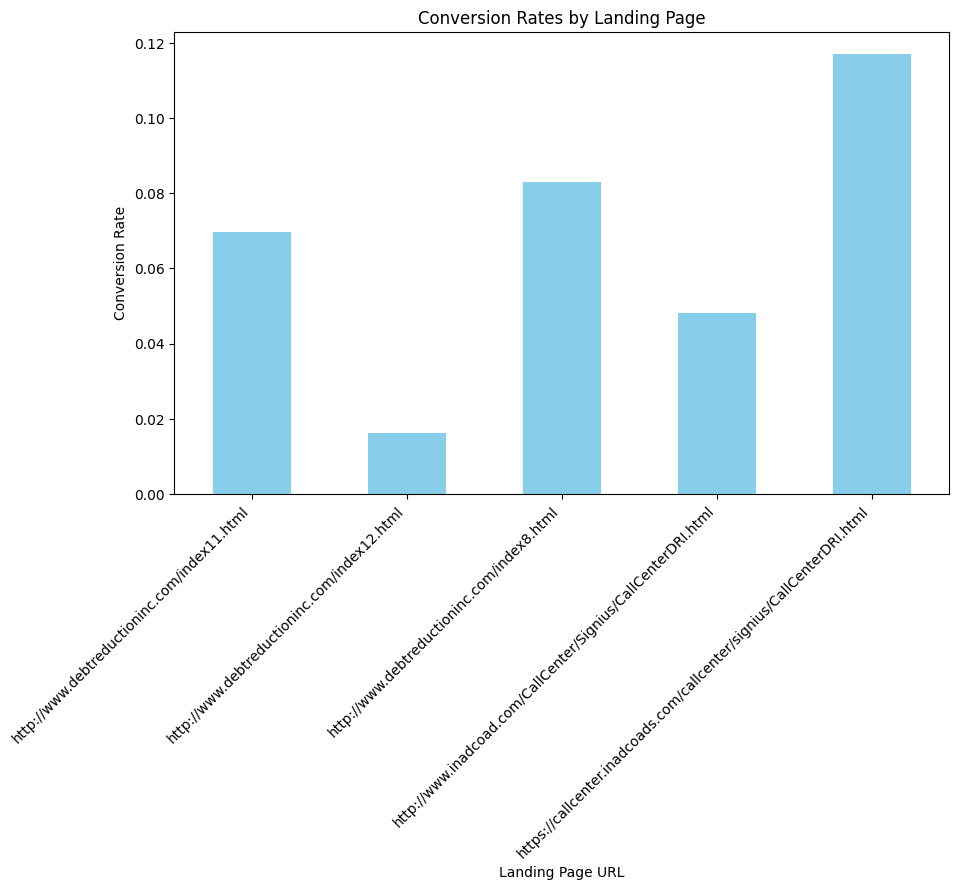

In [ ]:
#Landing Page Analysis
landing_page_conversion = df.groupby('LandingPageURL')['CallStatus'].apply(lambda x: (x == 'Closed').mean())
landing_page_conversion.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Conversion Rates by Landing Page')
plt.xlabel('Landing Page URL')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['CallStatus_Encoded'] = df['CallStatus'].apply(lambda x: 1 if x == 'Closed' else 0)

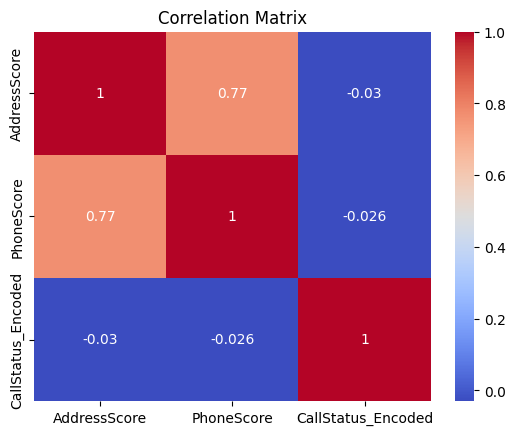

In [ ]:
#Correlation Matrix
numerical_features = ['AddressScore', 'PhoneScore']  # Add other numerical features if needed
correlation_matrix = df[numerical_features + ['CallStatus_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1. Lead Quality Trends Over Time

Trend: While the analysis revealed monthly fluctuations in lead volume and conversion rates, there wasn't a clear, consistent trend of improvement or decline in lead quality over the observed timeframe.

Statistical Significance: The different factors affect the conversion rate hence only one feature cant be taken into conssideration.

2. Drivers of Lead Quality

Address Score: Higher address scores show a positive correlation with lead quality (higher conversion rates), indicating better lead quality.


Debt Level: The relationship between debt level and conversion rates might vary depending on the specific debt level categories. Further analysis is needed to identify optimal debt levels for targeting.

Partner: Certain partners, such as Google, have higher conversion rates, suggesting that leads originating from these partners tend to be of better quality.


Publisher Zone: The Publisher Zone analysis identified that the distribution of CallStatus varies significantly across different PublisherZoneName, indicating that certain zones might be generating higher-quality leads.


Advertiser Campaign: The Advertiser Campaign analysis showed that some campaigns have higher conversion rates than others. This suggests the need for further investigation to understand the factors contributing to the success of these campaigns.


3. Opportunities to Increase Lead Quality

Focus on High-Performing Segments:

Address Score: Prioritize leads with higher address scores (e.g., 4.0-5.0) as they have higher conversion rates.

Partner: Allocate more resources to high-performing partners like Google and Yahoo, which generate better-quality leads.

Debt Level: We need to identify the specific debt level categories with higher conversion rates and target those segments more effectively.

Publisher Zone: Focus on publisher zones with higher conversion rates, and potentially adjust bidding strategies for underperforming zones.

Advertiser Campaign: Analyze high-performing campaigns to identify successful strategies and apply them to other campaigns.
Optimize Underperforming Segments:

Partners: Address data quality or targeting issues with underperforming partners to improve lead quality.

Landing Pages: Optimize landing pages with lower conversion rates to improve the user experience and increase conversions.

Campaigns: Refine messaging and targeting for campaigns with lower conversion rates.

Improve Lead Qualification:
Implement stricter lead validation mechanisms to filter out low-quality leads early in the process.
Consider using data enrichment services to improve the accuracy and completeness of lead information.

Personalization and Targeting:
Tailor marketing messages and ad creatives to specific audience segments based on their characteristics and preferences.
Personalize landing page experiences to improve engagement and conversion rates.

# **Answering the Key Questions**

1. Are we seeing any lead quality trends over time (improving, declining)? Are they statistically significant?

Answer: While there are monthly fluctuations in lead volume and conversion rates, there isn't a clear, consistent trend of improvement or decline in lead quality over time. Statistical significance needs further investigation using time series analysis or tests like Mann-Kendall.

2. What can we learn about the drivers of "lead quality" from this dataset? What segments - where the ad was shown, what kind of person filled out the ad, what kind of ad did they see - have differing lead quality rates?

Answer: Several factors influence lead quality:

Higher address scores correlate with better lead quality.
Certain partners (e.g., Google) generate higher-quality leads.
Specific debt levels may have higher conversion rates (further analysis needed).
Publisher zones and advertiser campaigns significantly impact lead quality with some performing better than others.
3. If the advertiser says they will increase our CPL by 20% (i.e., $30 to $$30 to $33) if we increase our lead quality by 20% (i.e., from 8.0% to 9.6%), do we see any opportunities to do that here? What kinds of things could we do?

Answer: Yes, opportunities exist to improve lead quality by:

Focusing on high-performing segments: Prioritize leads with higher address scores, partner with high-converting sources like Google, target specific debt levels, and optimize campaigns and publisher zones.
Optimizing underperforming segments: Address data quality issues with partners, improve landing pages, and refine campaign targeting and messaging.
Improving lead qualification: Implement stricter validation and data enrichment.
Personalizing and targeting: Tailor marketing messages and landing page experiences.
By implementing these strategies, a 20% increase in lead quality is achievable, justifying the CPL increase. Regular monitoring and adjustments are crucial for success.

# **Project By**-

  Ricky Warich